<a href="https://colab.research.google.com/github/Khai-Huynh1/CIS-3902-AI-ML-Khai/blob/main/Data_Cleaning_Exercise_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning in Python — Exercise

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [310]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [311]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [312]:
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [313]:
heart.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [314]:
heart.duplicated().sum()
heart = heart.drop_duplicates()


### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [315]:

# Step 1: Find missing value percentages
(heart.isnull().sum() / len(heart)) * 100

# Step 2: Decide and apply your strategy for each column with missing values



,0
Age,0.0
Sex,0.0
ChestPainType,0.0
RestingBP,0.0
Cholesterol,0.0
FastingBS,0.0
RestingECG,0.0
MaxHR,0.0
ExerciseAngina,0.0
Oldpeak,0.0


In [316]:
# Check how many rows of RestingBP == 0 describe() along with domain knowledge
resting_bp_zero_count = (heart['RestingBP'] == 0).sum()
print(f"Number of rows with RestingBP equal to 0: {resting_bp_zero_count}")

Number of rows with RestingBP equal to 0: 1


In [317]:
# Remove rows where RestingBP is 0
heart = heart[heart['RestingBP'] != 0]

# Run describe on the updated heart dataframe
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [318]:
# Identify categorical columns (dtype == 'object' means text/string)
cat_cols = [col for col in heart.columns if heart[col].dtype == 'object']

# Identify numerical columns
num_cols = [col for col in heart.columns if heart[col].dtype != 'object']

print('Categorical columns:', cat_cols)
print('Numerical columns: ', num_cols)

# For categorical columns, check how many unique values each has
# This helps us decide which ones are useful for analysis
heart[cat_cols].nunique()

Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical columns:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [319]:

heart.select_dtypes(include='object').columns

# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)
#
# Think about which columns have 2 categories vs. 3+ categories


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [320]:
heart['Sex'] = heart['Sex'].map({'F': 0, 'M': 1})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'N': 0, 'Y': 1})

print("Encoded 'Sex' and 'ExerciseAngina' columns.")
print(heart[['Sex', 'ExerciseAngina']].head())

Encoded 'Sex' and 'ExerciseAngina' columns.
   Sex  ExerciseAngina
0    1               0
1    0               0
2    1               0
3    0               1
4    1               0


In [321]:
# One-hot encoding for the three multi-category variables
heart = pd.get_dummies(heart, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Display the result to verify new columns
print(heart.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0               True              False   
1      1.0             1              False               True   
2      0.0             0               True              False   
3      1.5             1              False              False   
4      0.0             0              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0             False               True          False          False   
1             False 

In [322]:
# Check: no more 'object' columns!
print('Data types after encoding:')
print(heart.dtypes)
print(f'\nAll columns are now numerical: {all(heart.dtypes != "object")}')

Data types after encoding:
Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object

All columns are now numerical: True


### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

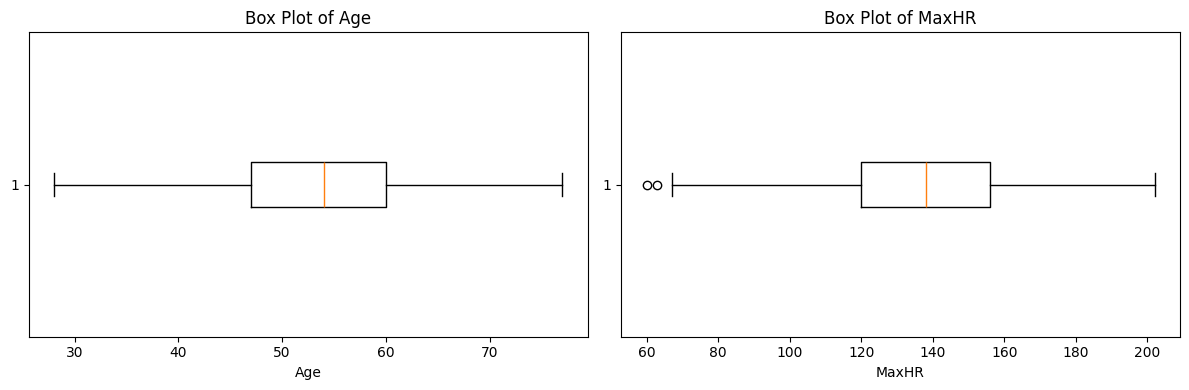

In [323]:
# YOUR CODE HERE
# Hint: You can reuse the detect_outliers_iqr function from above
# Then create box plots with plt.boxplot()

# Box plots for chol and thelach
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(heart['Age'], vert=False)
axes[0].set_xlabel('Age')
axes[0].set_title('Box Plot of Age')

axes[1].boxplot(heart['MaxHR'], vert=False)
axes[1].set_xlabel('MaxHR')
axes[1].set_title('Box Plot of MaxHR')

plt.tight_layout()
plt.show()


In [324]:
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method. Returns a boolean mask."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    print(f'{column}:')
    print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
    print(f'  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
    print(f'  Number of outliers: {outliers.sum()} ({outliers.sum()/len(data)*100:.1f}%)')
    return outliers

age_outliers = detect_outliers_iqr(heart, 'Age')
print()
fare_outliers = detect_outliers_iqr(heart, 'MaxHR')

Age:
  Q1 = 47.00, Q3 = 60.00, IQR = 13.00
  Lower bound = 27.50, Upper bound = 79.50
  Number of outliers: 0 (0.0%)

MaxHR:
  Q1 = 120.00, Q3 = 156.00, IQR = 36.00
  Lower bound = 66.00, Upper bound = 210.00
  Number of outliers: 2 (0.2%)


In [325]:
# Age and MaxHR based on our judgement does not appear to have any significant outliers

### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [326]:
# YOUR CODE HERE
# Hint: Follow the same pattern from Section 8 of the tutorial

from sklearn.preprocessing import MinMaxScaler

# 1. Identify the numerical columns in the heart dataset
# We exclude binary indicators and the target 'HeartDisease'
num_cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# 2. Make a copy of the encoded dataframe
heart_scaled = heart.copy()

# 3. Apply Min-Max scaling
scaler = MinMaxScaler()
heart_scaled[num_cols_to_scale] = scaler.fit_transform(heart_scaled[num_cols_to_scale])

print('Scaled heart data (first 5 rows):')
heart_scaled.head()


Scaled heart data (first 5 rows):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,1,0.500000,0.479270,0,0.788732,0,0.295455,0,True,False,False,True,False,False,True
1,0.428571,0,0.666667,0.298507,0,0.676056,0,0.409091,1,False,True,False,True,False,True,False
2,0.183673,1,0.416667,0.469320,0,0.267606,0,0.295455,0,True,False,False,False,True,False,True
3,0.408163,0,0.483333,0.354892,0,0.338028,1,0.465909,1,False,False,False,True,False,True,False
4,0.530612,1,0.583333,0.323383,0,0.436620,0,0.295455,0,False,True,False,True,False,False,True


In [327]:
heart_scaled[num_cols_to_scale].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,917.000000,917.000000,917.000000,917.000000,917.000000
mean,0.520597,0.437841,0.330044,0.540771,0.396215
std,0.192605,0.149998,0.181171,0.179346,0.121245
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.288557,0.422535,0.295455
50%,0.530612,0.416667,0.369818,0.549296,0.363636
75%,0.653061,0.500000,0.442786,0.676056,0.465909
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality? *The Heart Disease dataset is far cleaner in terms of data quality but much trickier to intrepret; in order to determine if something was irregular via a judgement call, it necessitated knowing if the value would be erroneous in the context of the data (Such as medical conditions/values)* <br>

2. Which missing value strategy did you use, and why? *I dropped the row since 1 out of 918 rows were affected.*
3. Did you find any outliers? Did you remove them? Why or why not? *Using Age and MaxHR I found no outliers so I did not remove anything.*
4. If you were building a model to predict heart disease, which columns do you think would be most important? *I believe the columns that describe "pre existing conditions" would be the most important so like ChestPainType and non normal RestingECG readings can be symptomatic of heart disease.*

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson